# Spam Detection


Objective: Classify the email whether it is spam or ham <br>
Category : Specifies whether mail is spam or not. <br>
1 --> Spam <br>
0 --> Not spam <br>

Dataset found in: <br>
1. https://www.kaggle.com/chandramoulinaidu/spam-classification-for-basic-nlp <br>
2. https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset


Made by: Russel John Evangelista

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option.maxrows = 500
pd.set_option.maxcolumns = 10
sns.set_style('darkgrid')

# Data Preparation

Reading Data, Analyzing Data, Table Modification, Feature Engineering

In [2]:
df1 = pd.read_csv('spam_or_not_spam.csv')
df2 = pd.read_csv('Spam Email raw text for NLP.csv')
df2 =  df2.rename(columns={'CATEGORY':'label', 'MESSAGE':'email'}).drop('FILE_NAME', axis=1)
df = pd.concat([df1,df2]).sample(frac=1).reset_index(drop=True)
df.head()

,email,label
0,"<HTML>\n\n<BODY BGCOLOR=3D""#ffffff"">\n\n<P>\n\...",1
1,now you can have hundreds of lenders compete ...,1
2,,1
3,"Sorry, gang, but I've flipped the switch. If y...",0
4,INSIGHT NEWS ALERT!\n\n\n\nA new issue of Insi...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   8795 non-null   object
 1   label   8796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 137.6+ KB


In [4]:
df['email'] = df['email'].astype('string')
df.dtypes

email    string
label     int64
dtype: object

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,email,label
0,"<HTML> <BODY BGCOLOR=3D""#ffffff""> <P> <<HTM...",1
1,now you can have hundreds of lenders compete ...,1
2,,1
3,"Sorry, gang, but I've flipped the switch. If y...",0
4,INSIGHT NEWS ALERT! A new issue of Insight ...,1


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
email,8497,8497,"<HTML>\n\n<BODY BGCOLOR=3D""#ffffff"">\n\n<P>\n\...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,8498.0,NaN,NaN,NaN,0.257825,0.437463,0.0,0.0,0.0,1.0,1.0


In [7]:
df.isnull().sum()

email    1
label    0
dtype: int64

In [8]:
df[df['email'].isna()]

,email,label
5758,<NA>,1


In [9]:
df.fillna('You have won a house and lot congratulations! Please sign up for this and click this link to get started', inplace=True)

([<matplotlib.patches.Wedge at 0x22ce0f7d250>,
 [Text(-0.7584623757983694, 0.7967024692432509, '0'),
  Text(0.8274135008709483, -0.869129966447183, '1')],
 [Text(-0.41370675043547417, 0.4345649832235914, '74.22%'),
  Text(0.48265787550805317, -0.5069924804275233, '25.78%')])

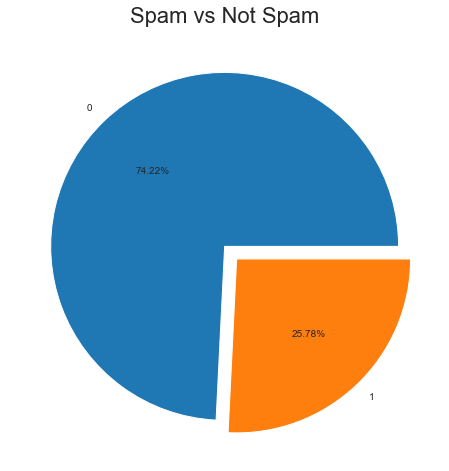

In [10]:
label_index = df.loc[:,'label'].value_counts().index
label_value = df.loc[:,'label'].value_counts().values

plt.figure(figsize=(15,8))
plt.title('Spam vs Not Spam', fontdict={'fontsize':22})
plt.pie(x=label_value, labels=label_index, autopct='%1.2f%%', explode=[0,0.1])

In [11]:
df['label'].value_counts()

0    6307
1    2191
Name: label, dtype: int64

# Insights

Since the dataset is imbalance, We can perfrom sampling techniques. However, I would like to keep that data as is because in real-life scenario, spams mails are rare. Because of that, I won't be using Accuracy. Instead, we can either choose Precision or Recall.

# Data Transformation
Process:
1. removing html tags
2. removing extra characters except for "!"
3. removing stop words
4. porting and stemming

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import regexp_tokenize
from bs4 import BeautifulSoup

In [13]:
def clean_tokenize_stop(text):
    
    #Removes Unnecessary characters and only collects alphabets or numbers
    cleaned_text = BeautifulSoup(text).get_text()
    
    characters = r"(\w+|\w!|!|\d)"
    cleaned = regexp_tokenize(cleaned_text, characters) #transform text into lower cases
        
    #Removing stopwords or common words which dont add any meaning
    stopwords_ = stopwords.words("english")
    cleaned2 = [item for item in cleaned if item not in stopwords_]
    
    cleaned3 = [PorterStemmer().stem(word) for word in cleaned2]
    cleaned4 = [WordNetLemmatizer().lemmatize(word) for word in cleaned3] # running runs
    
    cleaned5 = ' '.join([word for word in cleaned4]) 
                
    return cleaned5

In [14]:
df['email'] = df['email'].apply(clean_tokenize_stop)
df

,email,label
0,get high legal ! IT realli work ! pas all drug...,1
1,hundr lender compet loan fact interest rate lo...,1
2,,1
3,sorri gang I flip switch If post address match...,0
4,insight new alert ! A new issu insight new onl...,1
...,...,...
8493,On thu 25 jul 2002 11 07 00 0200 matthia saou ...,0
8494,Hi I tri rebuild xine src packag I get error f...,0
8495,number hit also get lot think use domain regis...,0
8496,On thu 25 jul 2002 joseph S barrera iii wrote ...,0


# Words Frequency Distribution
Im going to plot the frequency or the number of times the word appeared in the corpus.

In [15]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

allwords = ' '.join([word for word in df['email']]) # ['feel', 'family']
words = word_tokenize(allwords)
fd = FreqDist(words)

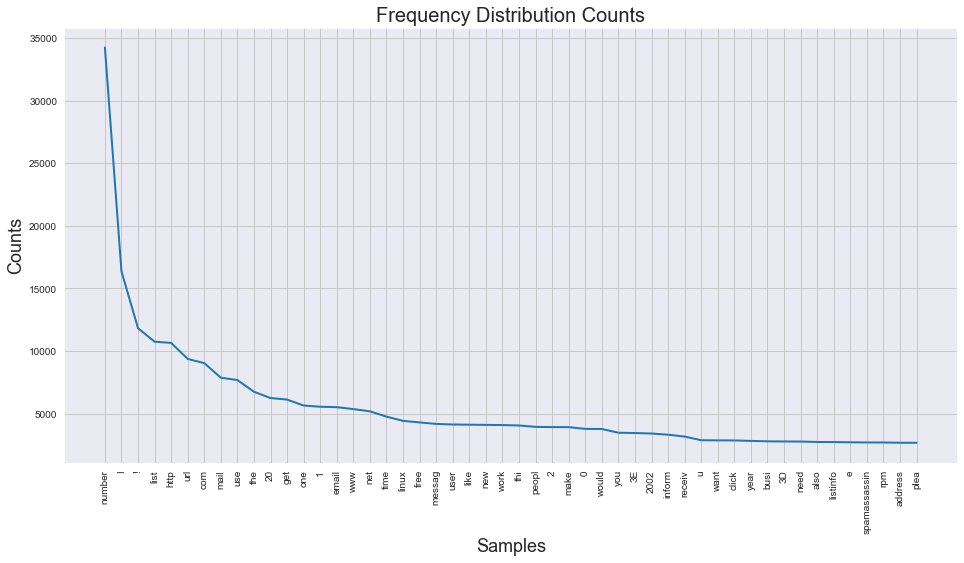

<AxesSubplot:title={'center':'Frequency Distribution Counts'}, xlabel='Samples', ylabel='Counts'>

In [16]:
# Plotting the frequency counts
plt.figure(figsize=(16,8))
plt.title('Frequency Distribution Counts', fontdict={'size': 20})
plt.xlabel('Words', fontdict={'size': 18})
plt.ylabel('Counts', fontdict={'size': 18})
fd.plot(50, cumulative =False)

(-0.5, 1199.5, 499.5, -0.5)

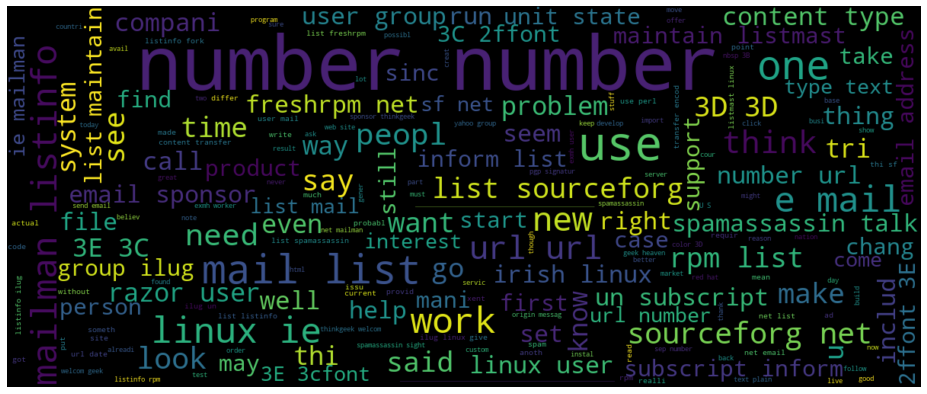

In [17]:
#Plotting some word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=1200, 
                     height=500, 
                     random_state=2, 
                     max_font_size=100).generate(allwords)

plt.figure(figsize=(17, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Model Creation

Since the dataset is imbalance, precision is more preferrable than accuracy. The reason is True Positive Rate is more important to me than False Positive Rate because Detecting Spam is important on how many times the model predicted it right.

I created 5 models and I will only get the top 3 to perform hyper parameter tuning. Splitting the data by 80-20 for training and testing respectively

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import RocCurveDisplay
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2)

In [20]:
pipe_NB = Pipeline([
    ('cv1', CountVectorizer()),
    ('NB', MultinomialNB())
])

pipe_LR = Pipeline([
    ('cv2', CountVectorizer()),
    ('LR', LogisticRegression())
])

pipe_GB = Pipeline([
    ('cv3', CountVectorizer()),
    ('GB', GradientBoostingClassifier())
])

pipe_RF = Pipeline([
    ('cv4', CountVectorizer()),
    ('RF', RandomForestClassifier())
])

pipe_DT = Pipeline([
    ('cv5', CountVectorizer()),
    ('DT', DecisionTreeClassifier())
])

pipelines = [pipe_NB, pipe_LR, pipe_GB, pipe_RF, pipe_DT]
pipelines

[Pipeline(steps=[('cv1', CountVectorizer()), ('NB', MultinomialNB())]),
 Pipeline(steps=[('cv2', CountVectorizer()), ('LR', LogisticRegression())]),
 Pipeline(steps=[('cv3', CountVectorizer()),
                 ('GB', GradientBoostingClassifier())]),
 Pipeline(steps=[('cv4', CountVectorizer()), ('RF', RandomForestClassifier())]),
 Pipeline(steps=[('cv5', CountVectorizer()), ('DT', DecisionTreeClassifier())])]

In [25]:
for pipe in tqdm(pipelines):
    pipe.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.00s/it]


In [26]:
pipe_names = ['Multinomial Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'Random Forest', 'Decision Tree']
pipe_train_scores = []
pipe_test_scores = []

for pipe in pipelines:
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    pipe_train_scores.append(precision_score(y_true= y_train, y_pred=y_pred_train)*100)
    pipe_test_scores.append(precision_score(y_true= y_test, y_pred=y_pred_test)*100)
    
data_acc = pd.DataFrame({
    'names': pipe_names + pipe_names, # [naive,logistic, ...., navive]
    'score': pipe_train_scores + pipe_test_scores, # [98,97,...,87,88]
    'label' : (['train']*5) + (['test']*5) # [train, train, train, ..., test,test] 
})

Text(0, 0.5, 'Precision (percentage)')

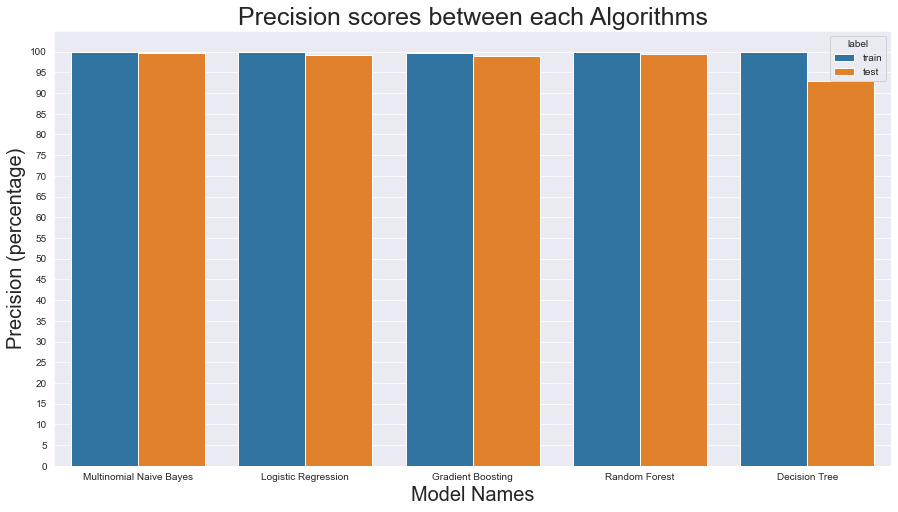

In [27]:
plt.figure(figsize=(15,8))
plt.title('Precision scores between each Algorithms', fontdict={'fontsize':25})
sns.barplot(data= data_acc, x='names', y='score', hue='label')
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.yticks(range(0,105,5))
plt.ylabel('Precision (percentage)', fontdict={'fontsize':20})

# Based from the results, I will get the Naive Bayes, Logistic Regression, and Random Forest

We can see that these models are overfitted. But in Optimization using GridSearchCV, we can solve that problem.

# MultiNomial Naive Bayes HyperParamter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
pipe = Pipeline([('Vectorizer', CountVectorizer())
                ,("classifier", MultinomialNB())])

ngram_range = [(1,1), (2,2), (3,3)]
alpha_range = [0, 0.1, 1, 3, 5, 10]

grid_param = {"Vectorizer": [CountVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [MultinomialNB()],
                 "classifier__alpha": alpha_range
                 }

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1,scoring='precision') 
NB = gridsearch.fit(X_train,y_train)

In [30]:
cols = ['mean_fit_time', 'params', 'mean_test_score', 'rank_test_score']
pd.DataFrame(NB.cv_results_)[cols].sort_values(by=['rank_test_score', 'mean_fit_time']).head()

,mean_fit_time,params,mean_test_score,rank_test_score
6,5.031439,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",0.997693,1
7,5.023384,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",0.995990,2
5,1.891164,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",0.995931,3
4,1.958742,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",0.995609,4
1,1.800576,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",0.995295,5


In [31]:
NB.best_params_

{'Vectorizer': CountVectorizer(ngram_range=(2, 2)),
 'Vectorizer__ngram_range': (2, 2),
 'classifier': MultinomialNB(alpha=0),
 'classifier__alpha': 0}

In [32]:
nb_score = NB.score(X_test, y_test)*100
nb_score

99.51338199513383

# Logistic Regression HyperParameter Tuning

In [33]:
pipe = Pipeline([('Vectorizer', CountVectorizer())
                ,("classifier", LogisticRegression())])

ngram_range = [(1,1), (2,2), (3,3)]
c_range = [0.01, 0.1, 1, 3, 5, 10]
penalty = ['l1', 'l2']

grid_param = {"Vectorizer": [CountVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [LogisticRegression()],
                 "classifier__penalty": penalty,
                 "classifier__C": c_range
                 }

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1,scoring='precision') 
LR = gridsearch.fit(X_train,y_train) 

In [34]:
cols = ['mean_fit_time', 'params', 'mean_test_score', 'rank_test_score']
pd.DataFrame(LR.cv_results_)[cols].sort_values(by=['rank_test_score', 'mean_fit_time']).head()

,mean_fit_time,params,mean_test_score,rank_test_score
5,4.006109,"{'Vectorizer': CountVectorizer(), 'Vectorizer_...",0.995350,1
3,3.093504,"{'Vectorizer': CountVectorizer(), 'Vectorizer_...",0.994115,2
13,9.219560,"{'Vectorizer': CountVectorizer(), 'Vectorizer_...",0.993319,3
1,3.731092,"{'Vectorizer': CountVectorizer(), 'Vectorizer_...",0.993197,4
7,4.276489,"{'Vectorizer': CountVectorizer(), 'Vectorizer_...",0.993088,5


In [35]:
LR.best_params_

{'Vectorizer': CountVectorizer(),
 'Vectorizer__ngram_range': (1, 1),
 'classifier': LogisticRegression(C=1),
 'classifier__C': 1,
 'classifier__penalty': 'l2'}

In [36]:
lr_score = LR.score(X_test, y_test)*100
lr_score

99.27007299270073

# Random Forest HyperParameter Tuning

In [37]:
ngram_range = [(1,1), (2,2), (3,3)]
max_depth_range = [5, 8, 12]
min_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

pipe = Pipeline([('Vectorizer', CountVectorizer())
                ,("classifier", RandomForestClassifier())])

grid_param = {"Vectorizer": [CountVectorizer()],
                "Vectorizer__ngram_range": ngram_range,
                "classifier": [RandomForestClassifier()],
                "classifier__max_depth": max_depth_range,
                "classifier__min_samples_leaf": min_leaf,
                "classifier__min_samples_split": min_samples_split
                }

gridsearch = GridSearchCV(pipe, grid_param, cv=5, n_jobs=-1, scoring='precision') 
RF = gridsearch.fit(X_train,y_train)

In [38]:
cols = ['mean_fit_time', 'params', 'mean_test_score', 'rank_test_score']
pd.DataFrame(RF.cv_results_)[cols].sort_values(by=['rank_test_score', 'mean_fit_time']).head()

,mean_fit_time,params,mean_test_score,rank_test_score
27,3.451466,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",1.0,1
28,3.489640,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",1.0,1
32,3.502433,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",1.0,1
30,3.521622,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",1.0,1
31,3.522420,"{'Vectorizer': CountVectorizer(ngram_range=(2,...",1.0,1


In [39]:
RF.best_params_

{'Vectorizer': CountVectorizer(ngram_range=(2, 2)),
 'Vectorizer__ngram_range': (2, 2),
 'classifier': RandomForestClassifier(max_depth=5),
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [40]:
rf_score = RF.score(X_test, y_test)*100
rf_score

100.0

Text(0, 0.5, 'Precision (percentage)')

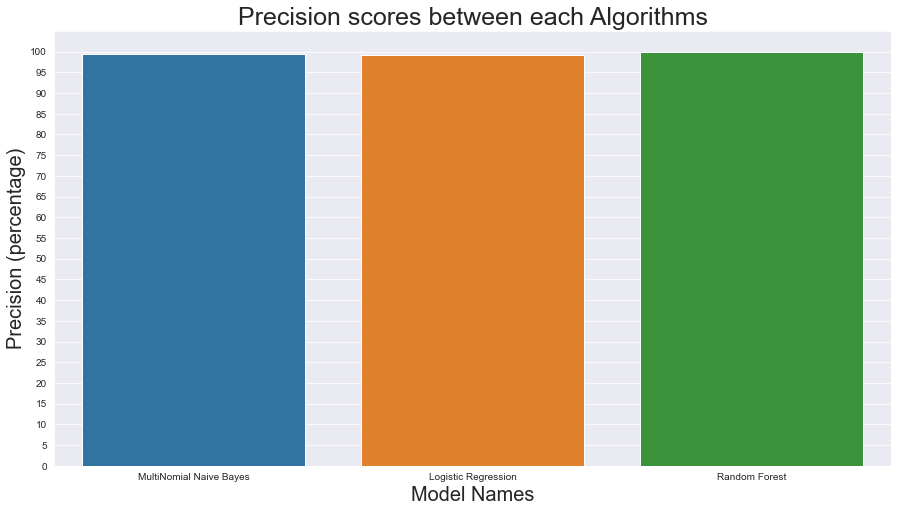

In [41]:
plt.figure(figsize=(15,8))
plt.title('Precision scores between each Algorithms', fontdict={'fontsize':25})
sns.barplot(x=['MultiNomial Naive Bayes', 'Logistic Regression', 'Random Forest'],
           y=[nb_score, lr_score, rf_score])
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.yticks(range(0,105,5))
plt.ylabel('Precision (percentage)', fontdict={'fontsize':20})

In [73]:
models = [NB, LR, RF]
names = ['Naive Bayes', 'Logisitic Regression', 'Random Forest']
for names, model in zip(names, models):
    print(names)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred=y_pred, y_true= y_test))
    print('-'*50)

Naive Bayes
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1279
           1       1.00      0.97      0.98       421

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.99      1700
weighted avg       0.99      0.99      0.99      1700

--------------------------------------------------
Logisitic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1279
           1       0.99      0.97      0.98       421

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.99      1700
weighted avg       0.99      0.99      0.99      1700

--------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1279
           1       1.00      0.04      0.07       421

    accuracy                     

In [62]:
best_model = Pipeline([('Vectorizer', CountVectorizer(ngram_range=(2, 2)))
                ,("classifier", MultinomialNB(alpha=0))])

best_model.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('classifier', MultinomialNB(alpha=0))])

# Insights

After the hyperparameter tuning, the models have slightly difference in precision. However, I like to use the MultiNomial Naive Bayes Classifier. Because of High Precision and Recall

# Results

Process: 
1. Confusion Matrix
2. Roc Curve
3. Classification Report
4. Cross Validation

In [63]:
trac = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
valac = cross_val_score(best_model, X_test, y_test, cv=5, scoring='precision', n_jobs=-1)

Text(0, 0.5, 'Precision (percentage)')

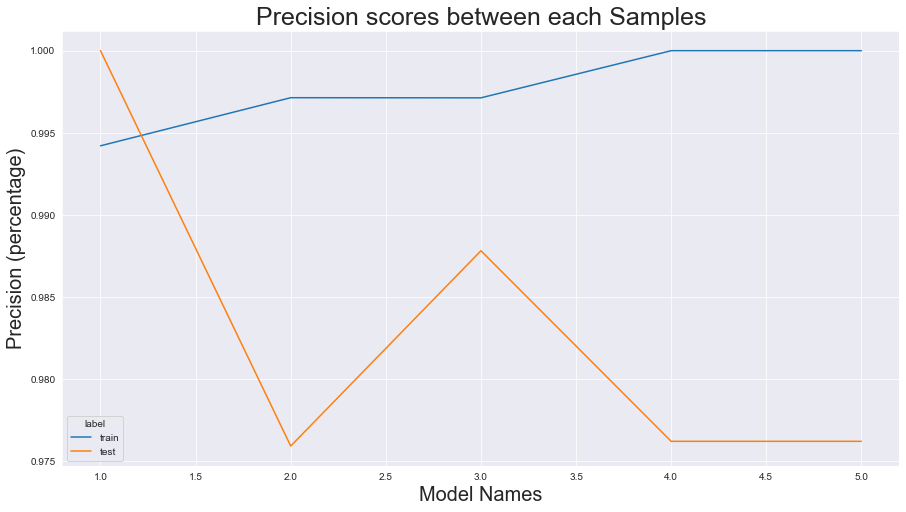

In [64]:
model_data_acc = pd.DataFrame({
    'score': np.concatenate([trac,valac]),
    'label': ['train']*5 + ['test'] * 5,
    'epochs': list(range(1, 6)) + list(range(1, 6))
})

plt.figure(figsize=(15,8))
plt.title('Precision scores between each Samples', fontdict={'fontsize':25})
sns.lineplot(data= model_data_acc, x='epochs', y='score', hue='label')
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.ylabel('Precision (percentage)', fontdict={'fontsize':20})

In [65]:
y_pred = best_model.predict(X_test)
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1279
           1       1.00      0.97      0.98       421

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.99      1700
weighted avg       0.99      0.99      0.99      1700



Text(115.0, 0.5, 'Ground Truth')

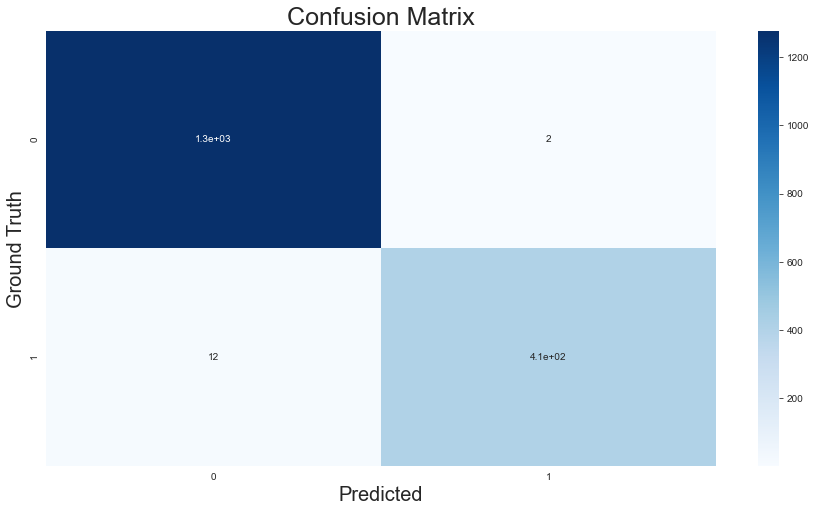

In [66]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(15, 8))
plt.title('Confusion Matrix', fontdict={'fontsize':25})
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, )
plt.xlabel('Predicted', fontdict={'fontsize':20})
plt.ylabel('Ground Truth', fontdict={'fontsize':20})

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

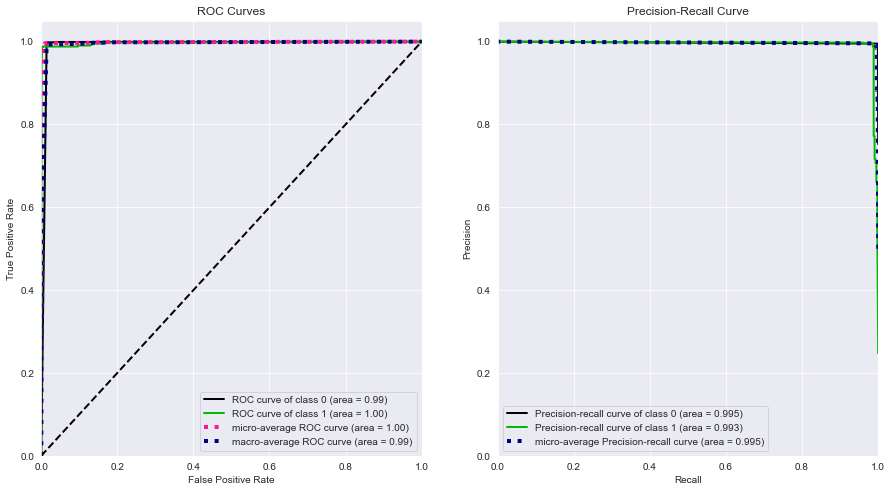

In [67]:
import scikitplot as skplt

y_probas = best_model.predict_proba(X_test)
fig,ax = plt.subplots(1,2, figsize=(15,8))
skplt.metrics.plot_roc_curve(y_test, y_probas, ax=ax[0])
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, ax=ax[1])

# Testing and Deployment
Testing the model and exporting the model

In [68]:
test1 = r"Yow russel how's life broo"

if NB.predict([test1])[0] == 0:
    print('Not a Spam!')
else:
    print('Definitely a Spam!')

Not a Spam!


In [69]:
import joblib

filename = 'model/finalized_model.pkl'
joblib.dump(best_model, filename)

['model/finalized_model.pkl']

In [70]:
joblib_model = joblib.load(filename)

In [71]:
np.round(joblib_model.score(X_test, y_test),2)*100

99.0